In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\Loan Approval Prediction 2.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [4]:
data.shape 

(319, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            319 non-null    object 
 1   Gender             314 non-null    object 
 2   Married            317 non-null    object 
 3   Dependents         312 non-null    object 
 4   Education          319 non-null    object 
 5   Self_Employed      303 non-null    object 
 6   ApplicantIncome    319 non-null    int64  
 7   CoapplicantIncome  319 non-null    float64
 8   LoanAmount         307 non-null    float64
 9   Loan_Amount_Term   309 non-null    float64
 10  Credit_History     293 non-null    float64
 11  Property_Area      319 non-null    object 
 12  Loan_Status        319 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 32.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,319.000000,319.000000,307.000000,309.000000,293.000000
mean,5224.006270,1497.174922,144.110749,342.718447,0.860068
std,5269.496189,1864.406317,83.884418,65.734326,0.347510
min,150.000000,0.000000,17.000000,36.000000,0.000000
25%,2928.000000,0.000000,100.000000,360.000000,1.000000
50%,3816.000000,1213.000000,126.000000,360.000000,1.000000
75%,5608.500000,2279.000000,166.500000,360.000000,1.000000
max,51763.000000,11300.000000,700.000000,480.000000,1.000000


In [7]:
# Check for missing values
print("Missing Values Before Cleaning:")
print(data.isnull().sum())

Missing Values Before Cleaning:
Loan_ID               0
Gender                5
Married               2
Dependents            7
Education             0
Self_Employed        16
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           12
Loan_Amount_Term     10
Credit_History       26
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Handle missing values
# Option 1: Drop rows with missing values
data = data.dropna()

In [9]:
# Handle missing values
data.dropna(inplace=True)

In [10]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [11]:
# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset:", data.shape)

Shape of the cleaned dataset: (250, 13)


## Exploratory Data Analysis (EDA)

In [12]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       250.000000         250.000000  250.000000          250.0000   
mean       5113.624000        1564.719200  141.528000          340.4640   
std        4713.615299        1960.962703   74.716715           67.2334   
min         150.000000           0.000000   17.000000           36.0000   
25%        2919.500000           0.000000  100.000000          360.0000   
50%        3829.000000        1255.000000  126.500000          360.0000   
75%        5555.000000        2297.250000  167.750000          360.0000   
max       39999.000000       11300.000000  600.000000          480.0000   

       Credit_History  
count      250.000000  
mean         0.864000  
std          0.343476  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


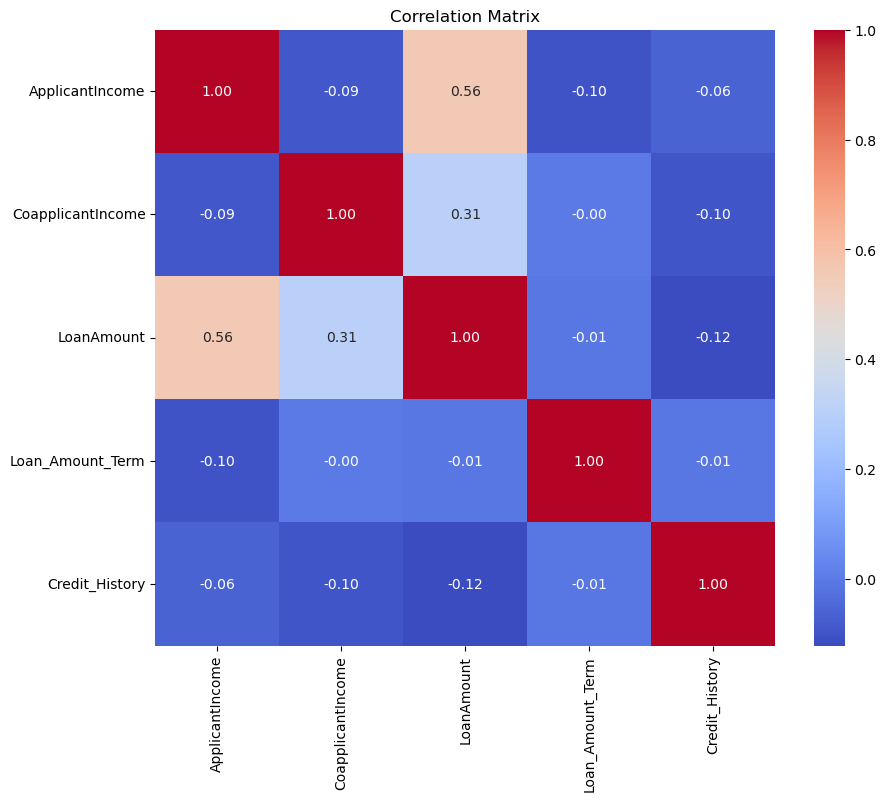

In [13]:
# Correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

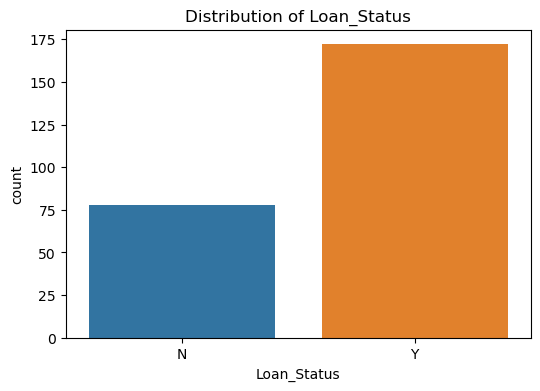

In [15]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=data)
plt.title('Distribution of Loan_Status')
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


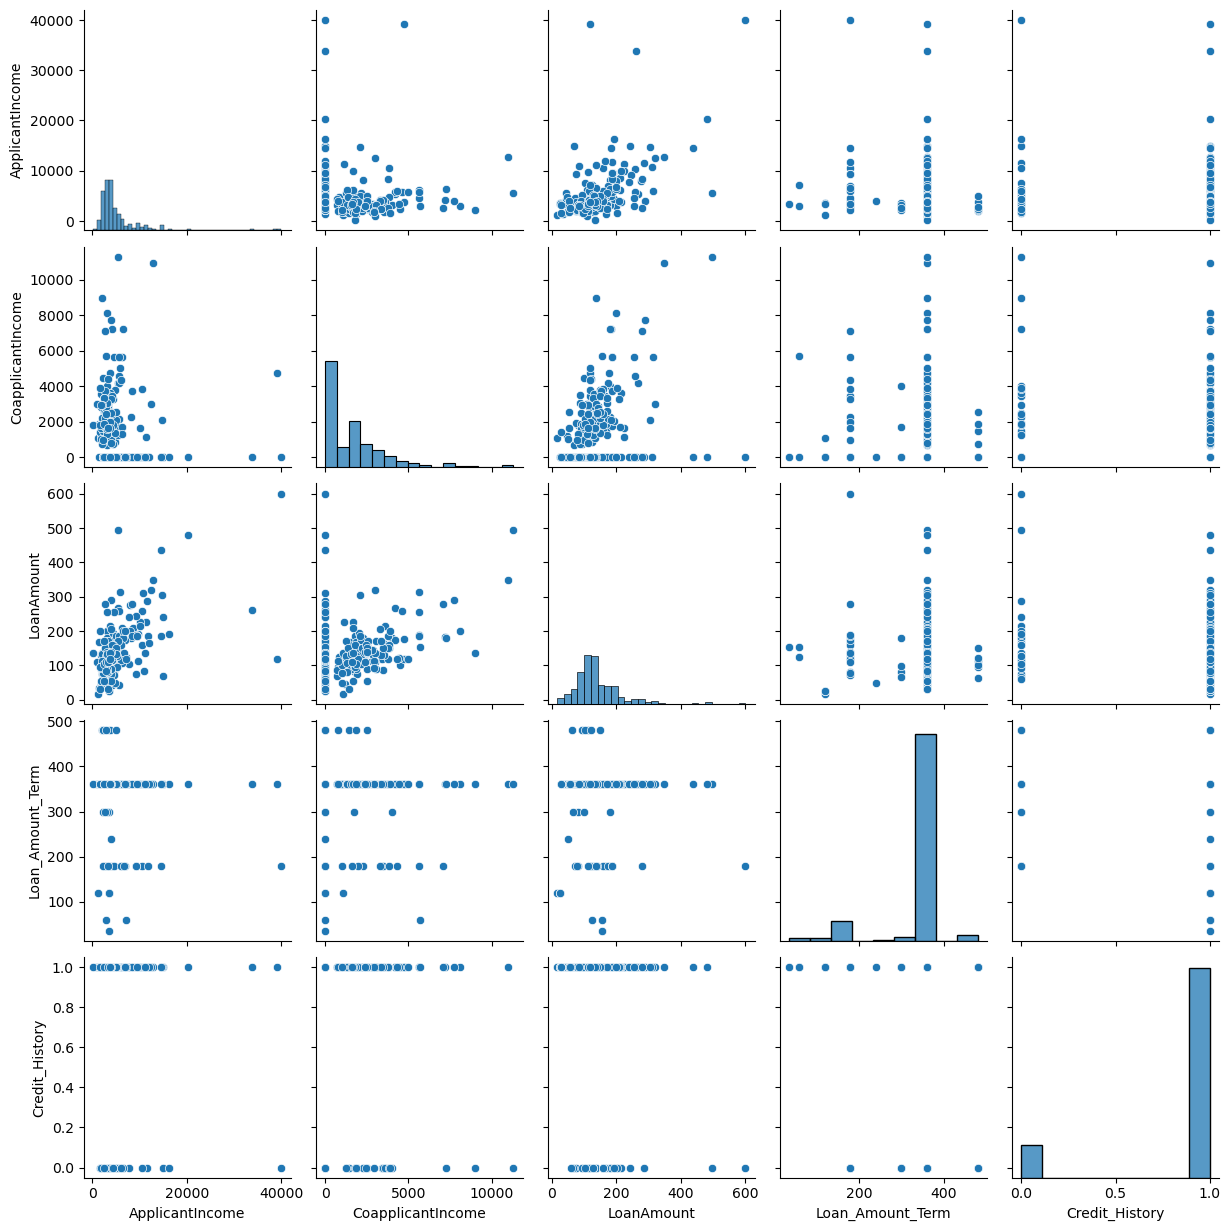

In [16]:
sns.pairplot(data)

### preprocessing with LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

# Define columns to be encoded
columns = ['Married', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in columns:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Check if encoding was successful
print(data.head())

    Loan_ID Gender  Married Dependents     Education  Self_Employed  \
1  LP001003   Male        1          1      Graduate              0   
2  LP001005   Male        1          0      Graduate              1   
3  LP001006   Male        1          0  Not Graduate              0   
4  LP001008   Male        0          0      Graduate              0   
5  LP001011   Male        1          2      Graduate              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3 

In [18]:
# Define columns to be encoded
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [19]:
# Initialize LabelEncoder
le = LabelEncoder()

In [20]:
for col in columns:
    data[col] = le.fit_transform(data[col])

In [21]:
# Split dataset into features and target variable
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = data['Loan_Status']  # Target variable

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Classifier

In [23]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [24]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf_classifier.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7733333333333333


In [27]:
# Get classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        24
           1       0.77      0.94      0.85        51

    accuracy                           0.77        75
   macro avg       0.77      0.68      0.70        75
weighted avg       0.77      0.77      0.75        75



In [28]:
# Get confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10 14]
 [ 3 48]]


#### Support Vector Classifier (SVC)

In [29]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [30]:
# Split dataset into features and target variable
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = data['Loan_Status']  # Target variable

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Define the SVM classifier pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  # Support Vector Classifier
])

In [33]:
# Train the SVM classifier
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

In [34]:

# Predict the Loan_Status on the test data
y_pred_svm = svm_pipeline.predict(X_test)

In [35]:
# Evaluate the SVM classifier

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7866666666666666


In [36]:
# Get classification report for SVM classifier
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        24
           1       0.78      0.96      0.86        51

    accuracy                           0.79        75
   macro avg       0.81      0.69      0.71        75
weighted avg       0.80      0.79      0.76        75



In [37]:
# Get confusion matrix for SVM classifier
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Confusion Matrix:
[[10 14]
 [ 2 49]]


#### GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [40]:
# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
# Predict the Loan_Status on the test data
y_pred_gb = gb_classifier.predict(X_test)

In [42]:
# Evaluate the Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.72


In [43]:
# Get classification report for Gradient Boosting Classifier
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.76      0.86      0.81        51

    accuracy                           0.72        75
   macro avg       0.67      0.64      0.65        75
weighted avg       0.70      0.72      0.71        75



In [44]:
# Get confusion matrix for Gradient Boosting Classifier
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Confusion Matrix:
[[10 14]
 [ 7 44]]
